In [27]:
#Load packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import curve_fit
from scipy.special import erf

In [28]:
#Import data from same folder

data=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv',error_bad_lines=False)
datastate=pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv',error_bad_lines=False)

In [29]:
#Fit to cumulative cases (not shown)

def fiterf(x, a, b,c):
    return a(1+erf(b*(x-c)))

In [30]:
#Fit to daily cases
#a=max daily cases
#b=width of curve (smaller is wider)
#c=peak day

def fitexp(x, a, b,c):
    return a*np.exp(-b*(x-c)**2)

In [41]:
#Define function to plot county data

def plotcountyrate(county,state,datatype):
    
    #Initialize arrays
    
    date=np.empty(0)
    cases=np.empty(0)
    rate=np.empty(0)
    
    #Calculate daily rate
    
    for i in range(len(data)):
        if data['state'][i]==state and data['county'][i]==county:
            date=np.append(date,data['date'][i])
            cases=np.append(cases,data[datatype][i])

    for i in range(len(cases)):
        if i==0:
            rate=np.append(rate,0)
        else:
            rate=np.append(rate,cases[i]-cases[i-1])

    #define plots
    
    fig, ax= plt.subplots()
    #ax.plot(date,cases,'-x')
    ax.plot(date,rate,'-x')

    #fit to gaussian curve
    daten=np.array(range(len(date)))
    popt, pcov = curve_fit(fitexp, daten, rate,bounds=([0,-1,0],[1e3,2.5,np.int(len(date)*1.3)]))
    xnew=np.linspace(0,np.int(len(date)*1.2),100)
    print('fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    ax.plot(xnew,fitexp(xnew,*popt))
    
    ax.axvline(popt[2],color='gray',linestyle='dashed')


    perr = np.sqrt(np.diag(pcov))
    print('std: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(perr))
    
    # create bounds
    
    bound_upper = fitexp(xnew, *(popt+(perr[0],0,0)))
    bound_lower = fitexp(xnew, *(popt-(min(perr[0],popt[0]),0,0)))
    
    # plotting the confidence intervals
    plt.fill_between(xnew, bound_lower, bound_upper,
                     color = 'black', alpha = 0.15)
    
    ax.set_ylim(0,np.max(rate)*1.2)

    ax.grid(axis='both')

    ax.set_xlabel('date')
    ax.set_ylabel('daily '+datatype)

    ax.set_xticks(date[::np.int(len(date)/3)])

    ax.set_title(county+', '+state+' daily cases')
    return plt.show()

In [42]:
#Same as above with state-level data

def plotstaterate(name,datatype):
    date=np.empty(0)
    cases=np.empty(0)
    rate=np.empty(0)
    for i in range(len(datastate)):
        if datastate['state'][i]==name:
            date=np.append(date,datastate['date'][i])
            cases=np.append(cases,datastate[datatype][i])

    for i in range(len(cases)):
        if i==0:
            rate=np.append(rate,0)
        else:
            rate=np.append(rate,cases[i]-cases[i-1])


    fig, ax= plt.subplots()
    #ax.plot(date,cases,'-x')
    ax.plot(date,rate,'-x')

    #fit
    daten=np.array(range(len(date)))
    popt, pcov = curve_fit(fitexp, daten, rate, bounds=([0,0,0],[1e5,0.2,np.int(len(date)*1.3)]))
    xnew=np.linspace(0,np.int(len(date)*1.2),100)
    print('fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))    
        
    ax.plot(xnew,fitexp(xnew,*popt))
    
    ax.axvline(popt[2],color='gray',linestyle='dashed')

    perr = np.sqrt(np.diag(pcov))
    print('std: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(perr))
    
    bound_upper = fitexp(xnew, *(popt+(perr[0],0,0)))
    bound_lower = fitexp(xnew, *(popt-(perr[0],0,0)))
    # plotting the confidence intervals
    plt.fill_between(xnew, bound_lower, bound_upper,
                     color = 'black', alpha = 0.15)

    ax.set_ylim(0,np.max(rate)*1.2)

    ax.set_xlabel('date')
    ax.set_ylabel('daily '+datatype)
    
    ax.grid(axis='both')

    ax.set_xticks(date[::np.int(len(date)/3)])
        
    ax.set_title(name+' daily cases')
    return plt.show()

fit: a=230.885, b=0.007, c=39.798
std: a=21.692, b=0.003, c=2.661


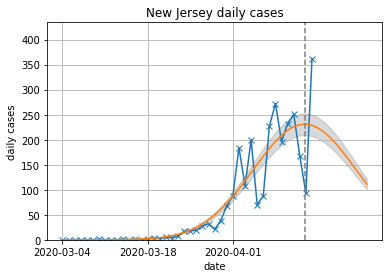

In [44]:
#plotstaterate('state','cases' or 'deaths')


plotstaterate('New Jersey','deaths')

fit: a=584.431, b=0.012, c=39.313
std: a=35.746, b=0.003, c=0.764


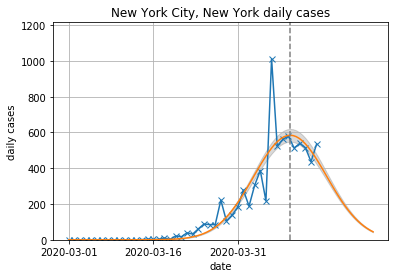

In [48]:
#plotcountyrate('county','state','cases' or 'deaths')

plotcountyrate('New York City','New York','deaths')